Project Description:
Citi Bike within NYC is one of the largest bike-sharing systems in the US.  The data from 2019 was used because it included the gender of the riders. The goal is to figure out a marketing campaign based on the data - who would you focus on and why?  
Research question: How is the subscription type when it comes to Citibike usage affected by location of the stations, birth year, and gender?

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns
%matplotlib inline

In [5]:
#import dataset
df = pd.read_csv('/Users/sonjibent/Desktop/Python2023/201912-citibike-tripdata-v2.csv')

Data format including the year 2019 and prior years:

#Trip Duration (seconds)
#Start Time and Date
#Stop Time and Date
#Start Station Name
#End Station Name
#Station ID
#Station Lat/Long
#Bike ID
#User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
#Gender (Zero=unknown; 1=male; 2=female)
#Year of Birth
This data has been processed to remove trips that are taken by staff as they service and inspect the system, trips that are taken to/from any of our “test” stations (which we were using more in June and July 2013), and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it's secure).

# Explore data

In [6]:
# view the shape of the data. The data has 19,728 rows and 15 columns of data.
df.shape

(955210, 19)

In [7]:
# View the labeled data in a table format
df.columns

Index(['tripduration', 'starttime', 'startdatenew', 'starttimenew', 'stoptime',
       'stopdatenew', 'stoptimenew', 'start station id', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       'bikeid', 'usertype', 'birth year', 'gender'],
      dtype='object')

In [8]:
# View the first 5 rows of data.
df.head()

,tripduration,starttime,startdatenew,starttimenew,stoptime,stopdatenew,stoptimenew,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,602,12/1/19 0:00,12/1/19,12:00:06 AM,12/1/19 0:10,12/1/19,12:10:08 AM,3382,Carroll St and Smith St,40.680611,-73.994758,3304,6 Ave and 9 St,40.668127,-73.983776,41932,Subscriber,1970,1
1,1206,12/1/19 0:00,12/1/19,12:00:11 AM,12/1/19 0:20,12/1/19,12:20:18 AM,362,Broadway and W 37 St,40.751726,-73.987535,500,Broadway and W 51 St,40.762288,-73.983362,18869,Customer,1999,1
2,723,12/1/19 0:00,12/1/19,12:00:12 AM,12/1/19 0:12,12/1/19,12:12:15 AM,146,Hudson St and Reade St,40.716250,-74.009106,238,Bank St and Washington St,40.736197,-74.008592,15334,Subscriber,1997,1
3,404,12/1/19 0:00,12/1/19,12:00:12 AM,12/1/19 0:06,12/1/19,12:06:57 AM,3834,Irving Ave and Halsey St,40.694670,-73.906630,3827,Halsey St and Broadway,40.685650,-73.915640,41692,Customer,1995,1
4,1059,12/1/19 0:00,12/1/19,12:00:15 AM,12/1/19 0:17,12/1/19,12:17:54 AM,500,Broadway and W 51 St,40.762288,-73.983362,3323,W 106 St and Central Park West,40.798186,-73.960591,40156,Subscriber,1961,1


In [9]:
# View the last 5 rows of data
df.tail()

,tripduration,starttime,startdatenew,starttimenew,stoptime,stopdatenew,stoptimenew,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
955205,93,12/31/19 23:58,12/31/19,11:58:18 PM,12/31/19 23:59,12/31/19,11:59:52 PM,3141,1 Ave and E 68 St,40.765005,-73.958185,3142,1 Ave and E 62 St,40.761227,-73.960940,28734,Subscriber,1985,2
955206,786,12/31/19 23:59,12/31/19,11:59:00 PM,1/1/20 0:12,1/1/20,12:12:06 AM,490,8 Ave and W 33 St,40.751551,-73.993934,513,W 56 St and 10 Ave,40.768254,-73.988639,41418,Subscriber,1991,1
955207,351,12/31/19 23:59,12/31/19,11:59:04 PM,1/1/20 0:04,1/1/20,12:04:55 AM,3349,Grand Army Plaza and Plaza St West,40.672968,-73.970880,3368,5 Ave and 3 St,40.672815,-73.983524,27746,Subscriber,1935,2
955208,1571,12/31/19 23:59,12/31/19,11:59:21 PM,1/1/20 0:25,1/1/20,12:25:33 AM,252,MacDougal St and Washington Sq,40.732264,-73.998522,366,Clinton Ave and Myrtle Ave,40.693261,-73.968896,28506,Subscriber,1980,1
955209,310,12/31/19 23:59,12/31/19,11:59:55 PM,1/1/20 0:05,1/1/20,12:05:06 AM,3351,E 102 St and 1 Ave,40.786995,-73.941648,3379,E 103 St and Lexington Ave,40.790305,-73.947558,21013,Subscriber,1969,0


In [10]:
#View how many null values are in each column
df.count()

tripduration               955210
starttime                  955210
startdatenew               955210
starttimenew               955210
stoptime                   955210
stopdatenew                955210
stoptimenew                955210
start station id           955210
start station name         955210
start station latitude     955210
start station longitude    955210
end station id             955210
end station name           955210
end station latitude       955210
end station longitude      955210
bikeid                     955210
usertype                   955210
birth year                 955210
gender                     955210
dtype: int64

In [11]:
# View the type of data in the frame
df.dtypes

tripduration                 int64
starttime                   object
startdatenew                object
starttimenew                object
stoptime                    object
stopdatenew                 object
stoptimenew                 object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

In [12]:
# View the data to figure out whether to change the index.  I will not change the index to another column.
df['tripduration'].is_unique

False

In [13]:
# View the data to figure out whether to change the index.  I will not change the index to another column.
df['start station id'].is_unique

False

In [14]:
# find the unique values in each column
for col in df:
  print(df[col].unique())

[   602   1206    723 ...   9710  30713 122099]
['12/1/19 0:00' '12/1/19 0:01' '12/1/19 0:02' ... '12/31/19 23:57'
 '12/31/19 23:58' '12/31/19 23:59']
['12/1/19' '12/2/19' '12/3/19' '12/4/19' '12/5/19' '12/6/19' '12/7/19'
 '12/8/19' '12/9/19' '12/10/19' '12/11/19' '12/12/19' '12/13/19'
 '12/14/19' '12/15/19' '12/16/19' '12/17/19' '12/18/19' '12/19/19'
 '12/20/19' '12/21/19' '12/22/19' '12/23/19' '12/24/19' '12/25/19'
 '12/26/19' '12/27/19' '12/28/19' '12/29/19' '12/30/19' '12/31/19']
['12:00:06 AM' '12:00:11 AM' '12:00:12 AM' ... '11:50:11 PM' '11:53:18 PM'
 '11:55:21 PM']
['12/1/19 0:10' '12/1/19 0:20' '12/1/19 0:12' ... '1/2/20 9:50'
 '1/1/20 0:12' '1/1/20 0:05']
['12/1/19' '12/4/19' '12/3/19' '12/5/19' '12/2/19' '12/9/19' '12/8/19'
 '12/7/19' '12/6/19' '1/5/20' '12/13/19' '1/8/20' '12/10/19' '12/14/19'
 '1/9/20' '1/14/20' '12/12/19' '12/11/19' '1/6/20' '12/15/19' '12/16/19'
 '12/18/19' '12/20/19' '12/23/19' '1/17/20' '12/21/19' '12/29/19'
 '12/24/19' '12/17/19' '1/10/20' '12/19/19' 

In [15]:
#view total number of missing values by column
# Count 'na' in each column
df.isnull().sum()

tripduration               0
starttime                  0
startdatenew               0
starttimenew               0
stoptime                   0
stopdatenew                0
stoptimenew                0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [16]:
# Check to see if any missing values
df.isnull()

,tripduration,starttime,startdatenew,starttimenew,stoptime,stopdatenew,stoptimenew,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955205,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
955206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
955207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
955208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Data Cleaning

1.) Change object columns into a new datatype(date)

In [17]:
# convert the column to a string. 
df['startdatenew'] = df['startdatenew'].astype(str)
df['stopdatenew'] = df['stopdatenew'].astype(str)

In [18]:
#Import library to change datetime
import datetime 
from datetime import timedelta

In [19]:
# Convert the data type of column from object to date.
startdate_input = df["startdatenew"].astype('datetime64[D]')
df["startdatenew"] =  pd.to_datetime(df["startdatenew"], format="%m/%d/%y")
stopdate_input = df["stopdatenew"].astype('datetime64[D]')
df["stopdatenew"] =  pd.to_datetime(df["stopdatenew"], format="%m/%d/%y")

2.) Change the values in the gender column.

In [22]:
# convert the 'gender' column to a string. 
df['gender'] = df['gender'].astype(str)

In [23]:
# Replace the values in the gender column with the gender names.
df['gender'] = df['gender'].replace(['0', '1', '2'], ['Unknown', 'Male', 'Female'])
df.head(10)

,tripduration,starttime,startdatenew,starttimenew,stoptime,stopdatenew,stoptimenew,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,602,12/1/19 0:00,2019-12-01,12:00:06 AM,12/1/19 0:10,2019-12-01,12:10:08 AM,3382,Carroll St and Smith St,40.680611,-73.994758,3304,6 Ave and 9 St,40.668127,-73.983776,41932,Subscriber,1970,Male
1,1206,12/1/19 0:00,2019-12-01,12:00:11 AM,12/1/19 0:20,2019-12-01,12:20:18 AM,362,Broadway and W 37 St,40.751726,-73.987535,500,Broadway and W 51 St,40.762288,-73.983362,18869,Customer,1999,Male
2,723,12/1/19 0:00,2019-12-01,12:00:12 AM,12/1/19 0:12,2019-12-01,12:12:15 AM,146,Hudson St and Reade St,40.716250,-74.009106,238,Bank St and Washington St,40.736197,-74.008592,15334,Subscriber,1997,Male
3,404,12/1/19 0:00,2019-12-01,12:00:12 AM,12/1/19 0:06,2019-12-01,12:06:57 AM,3834,Irving Ave and Halsey St,40.694670,-73.906630,3827,Halsey St and Broadway,40.685650,-73.915640,41692,Customer,1995,Male
4,1059,12/1/19 0:00,2019-12-01,12:00:15 AM,12/1/19 0:17,2019-12-01,12:17:54 AM,500,Broadway and W 51 St,40.762288,-73.983362,3323,W 106 St and Central Park West,40.798186,-73.960591,40156,Subscriber,1961,Male
5,1257,12/1/19 0:00,2019-12-01,12:00:20 AM,12/1/19 0:21,2019-12-01,12:21:18 AM,340,Madison St and Clinton St,40.712690,-73.987763,340,Madison St and Clinton St,40.712690,-73.987763,40829,Subscriber,1994,Male
6,624,12/1/19 0:00,2019-12-01,12:00:22 AM,12/1/19 0:10,2019-12-01,12:10:46 AM,469,Broadway and W 53 St,40.763441,-73.982681,526,E 33 St and 5 Ave,40.747659,-73.984907,24934,Subscriber,1983,Male
7,578,12/1/19 0:00,2019-12-01,12:00:33 AM,12/1/19 0:10,2019-12-01,12:10:12 AM,3382,Carroll St and Smith St,40.680611,-73.994758,3304,6 Ave and 9 St,40.668127,-73.983776,38966,Subscriber,1980,Male
8,431,12/1/19 0:00,2019-12-01,12:00:36 AM,12/1/19 0:07,2019-12-01,12:07:47 AM,448,W 37 St and 10 Ave,40.756604,-73.997901,72,W 52 St and 11 Ave,40.767272,-73.993929,38780,Subscriber,1986,Male
9,1223,12/1/19 0:00,2019-12-01,12:00:40 AM,12/1/19 0:21,2019-12-01,12:21:04 AM,465,Broadway and W 41 St,40.755136,-73.986580,359,E 47 St and Park Ave,40.755103,-73.974987,16810,Customer,1982,Male


In [24]:
# View the type of data in the frame
df.dtypes

tripduration                        int64
starttime                          object
startdatenew               datetime64[ns]
starttimenew                       object
stoptime                           object
stopdatenew                datetime64[ns]
stoptimenew                        object
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                             object
dtype: object

# Analysis and Visualization

How is the subscription type when it comes to Citibike usage affected by time of day, location of the stations, birth year, and gender?

In [57]:
#create a dataframe with only columns to be analyzed.
df2 = df[['tripduration', 'startdatenew', 'starttimenew', 'stoptimenew', 'stopdatenew','start station id','start station name','end station id','end station name','usertype','birth year','gender']]

In [26]:
#calculate the mean of each column
print(df2.mean(numeric_only=True))

tripduration         830.839683
start station id    1666.618973
end station id      1646.799030
birth year          1979.448958
dtype: float64


In [58]:
#Analyzes both numeric and object series
df2.describe(include=['object'])

,starttimenew,stoptimenew,start station name,end station name,usertype,gender
count,955210,955210,955210,955210,955210,955210
unique,79143,79257,881,882,2,3
top,8:35:09 AM,8:57:34 AM,Pershing Square North,Pershing Square North,Subscriber,Male
freq,47,42,7562,7495,877585,695884


# Examine gender

In [28]:
#Count gender
df2['gender'].value_counts()

Male       695884
Female     212896
Unknown     46430
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of Riders by Gender')

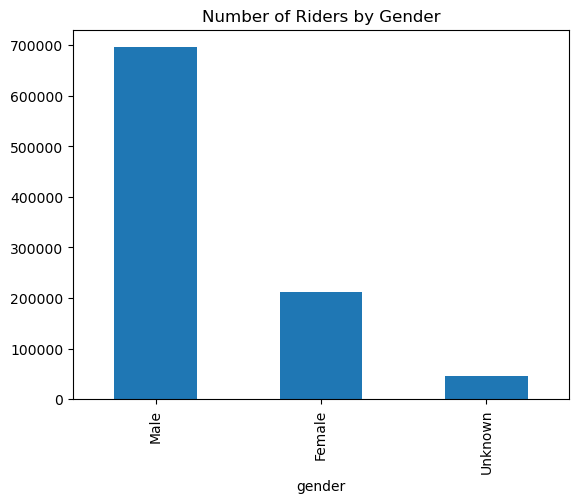

In [29]:
pd.value_counts(df2["gender"]).plot.bar()
plt.xlabel('gender')
plt.title('Number of Riders by Gender')

# Examine subscription/usertype

In [30]:
#Count gender
user_type = df2['usertype'].value_counts()

In [31]:
user_type

Subscriber    877585
Customer       77625
Name: usertype, dtype: int64

Text(0.5, 1.0, 'Number of User Types')

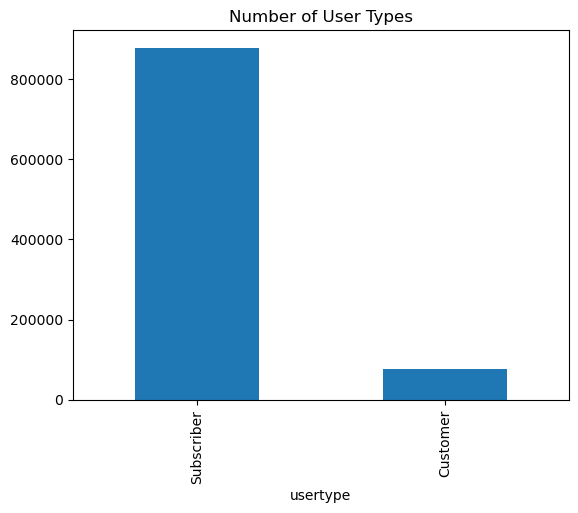

In [32]:
pd.value_counts(df2["usertype"]).plot.bar()
plt.xlabel('usertype')
plt.title('Number of User Types')

# Most popular station

In [33]:
# Count the number of trips
counts = df2[['start station id','end station id']].nunique()
counts

start station id    881
end station id      882
dtype: int64

In [34]:
#Amonut of trips ridden in December of 2019.
df2[['start station name','end station name']].\
value_counts().count()

132889

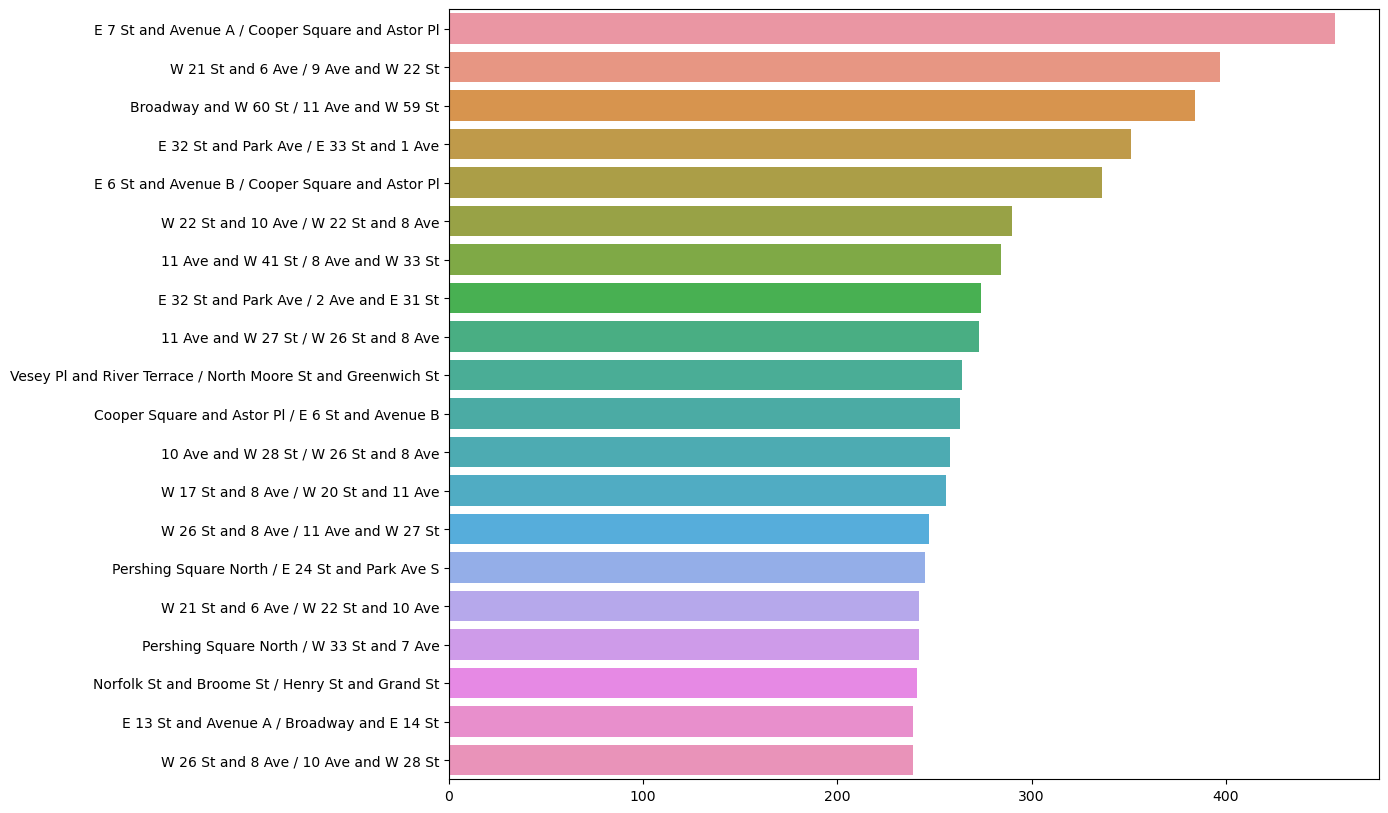

In [35]:
#Top twenty trips
trips=df.value_counts(['start station name','end station name'])[:20]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(12,10))
sns.barplot( x= list(trips.values), y = trip_names, orient="h") ;

# Analyze subsrcription (usertype) and gender

In [36]:
#Count usertype by female gender values
count_female = df2['usertype'][df2["gender"]=="Female"].value_counts()

In [37]:
count_female

Subscriber    199689
Customer       13207
Name: usertype, dtype: int64

In [38]:
#Count usertype by male gender values
count_male = df2['usertype'][df2["gender"]=="Male"].value_counts()

In [39]:
count_male

Subscriber    662705
Customer       33179
Name: usertype, dtype: int64

In [40]:
#Count usertype by unknown gender values
count_unknown = df2['usertype'][df2["gender"]=="Unknown"].value_counts()

In [41]:
count_unknown

Customer      31239
Subscriber    15191
Name: usertype, dtype: int64

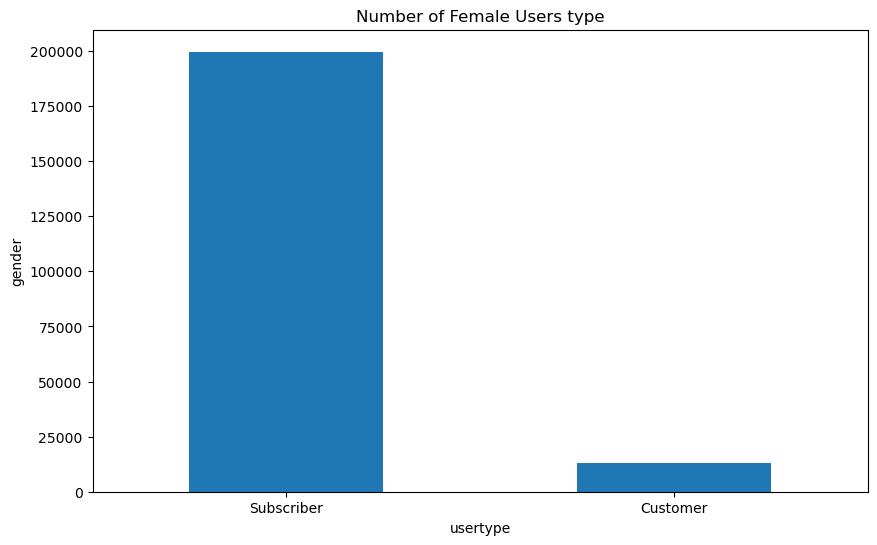

In [42]:
# Create the bar plot for female riders
plt.figure(figsize=(10, 6))
count_female.plot(kind='bar')
plt.xlabel('usertype')
plt.ylabel('gender')
plt.title('Number of Female Users type')
plt.xticks(rotation=0)
plt.show()

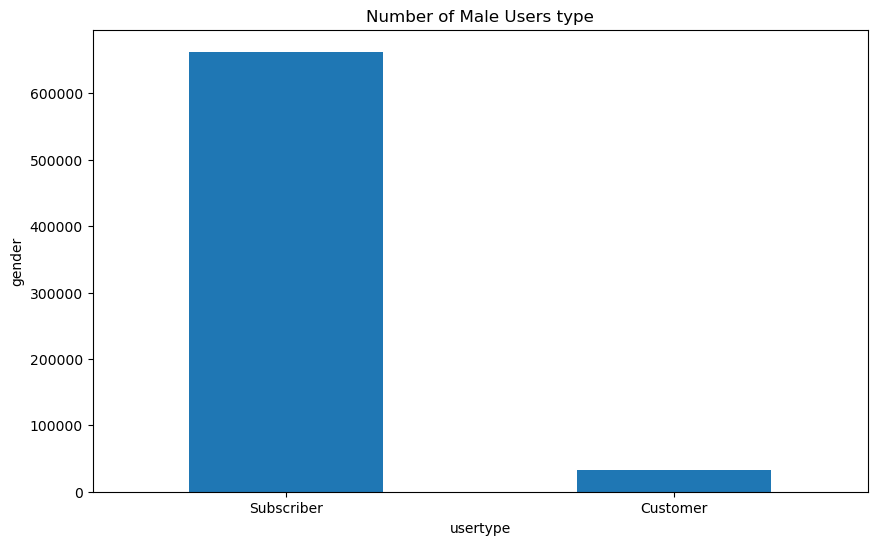

In [43]:
# Create the bar plot for male riders

plt.figure(figsize=(10, 6))
count_male.plot(kind='bar')
plt.xlabel('usertype')
plt.ylabel('gender')
plt.title('Number of Male Users type')
plt.xticks(rotation=0)
plt.show()

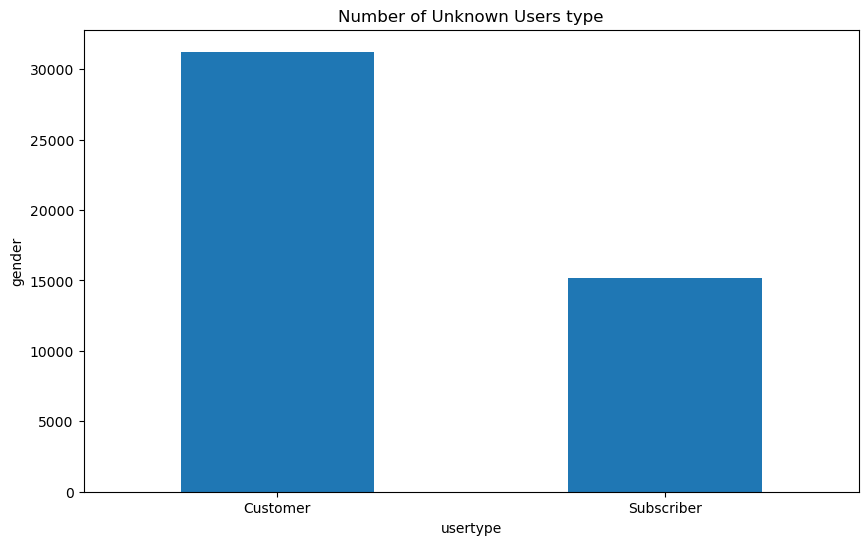

In [44]:
# Create the bar plot for unknown riders
plt.figure(figsize=(10, 6))
count_unknown.plot(kind='bar')
plt.xlabel('usertype')
plt.ylabel('gender')
plt.title('Number of Unknown Users type')
plt.xticks(rotation=0)
plt.show()

# Analyze subscription (user type) and birthyear

In [52]:
user_birth = df2.groupby('birth year')['usertype'].count()

In [53]:
user_birth

birth year
1885       1
1886      14
1887       5
1888      83
1889      31
        ... 
1999    8883
2000    6107
2001    2925
2002    1502
2003     852
Name: usertype, Length: 102, dtype: int64

Text(0.5, 1.0, 'Total of Birth Year by Subscription Type')

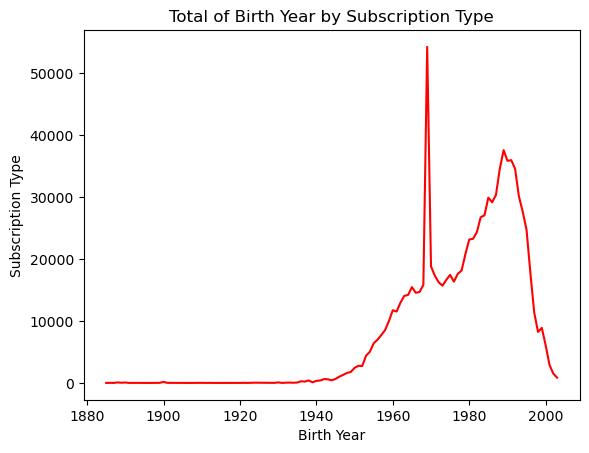

In [56]:
user_birth.plot(x='user_birth', y='user_type', kind='line', color='red')
plt.xlabel('Birth Year')
plt.ylabel('Subscription Type')
plt.title('Total of Birth Year by Subscription Type')
     

# Conclusion

The average trip duration was about 13 minutes.
The average birth year is 1979, which makes the average age 40.
Citi bike riders are mostly male.
Most Citi Bike riders are subscribers.
Males are mostly subscribers.
Based on the data riders are mostly 40 years of age and consist of males.  I would recommend that Citi Bike increase their ridership by advertising to females within NYC. 